In [36]:
import scipy
import obspy
import numpy as np
import pandas as pd
from scipy.fftpack.helper import next_fast_len
import matplotlib.pyplot  as plt
from scipy.signal import stft as stft
from scipy.signal import istft as istft

In [37]:
class sensor:
    name = ''
    z_30 = []
    Power_30 = []
    x = 0
    y = 0
    z = 0
    data = []
    Freq_30 = []
    KR=[]
    def __init__(self, str, name, x, y, z):
        self.name = name
        self.x = x
        self.y = y
        self.z = z
        self.data = obspy.read(str, debug_headers=True)[0].data
        
    def get_stfft(sample_rate):
        self.UPft = stft(self.data, sample_rate)
        
    def autoCorr(self):
        freq, time, stR1 = stft(self.data, 100, nperseg=5000)
            
        t, x = istft(stR1**2)
        
        plt.plot(t, x)
        plt.show()
        
        autoCorrR1 = []

        freq, time, stR1 = stft(self.data, 100, nperseg=5000)

        for window in range(len(stR1[:])):
            autoCorrR1.append(stR1[window]**2)

        PowerR1 = []
        for i in range(len(stR1[:])):
            PowerR1.append(sum(stR1[i])/len(stR1[i]))


        z_30 = []
        Power_30 = []
        i = 0
        while freq[i] <= 30:
            z_30.append(freq[i])
            Power_30.append(PowerR1[i])
            i +=1

        self.z_30 = z_30 
        self.Power_30 = Power_30
        
        auto = (np.fft.ifft(Power_30))
        
#         plt.plot(np.arange(len(Power_30)), auto)
#         plt.show()
        
        
    def Power(self):
        autoCorrR1 = []

        freq, time, stR1 = stft(self.data, 100, nperseg=5000)

        for window in range(len(stR1[:])):
            autoCorrR1.append(stR1[window]**2)

        PowerR1 = []
        FreqR1 = []
        for i in range(len(stR1[:])):
            PowerR1.append(sum(autoCorrR1[i])/len(autoCorrR1[i]))
            FreqR1.append(sum(stR1[i])/len(stR1[i]))


        z_30 = []
        Power_30 = []
        Freq_30 = []
        i = 0
        while freq[i] <= 30:
            z_30.append(freq[i])
            Power_30.append(PowerR1[i])
            Freq_30.append(FreqR1[i])
            i +=1

        self.z_30 = z_30 
        self.Power_30 = Power_30
        self.Freq_30 = Freq_30
        
#         plt.figure()
#         plt.plot(z_30, Power_30)
#         plt.ylim([0, max(Power_30) + 1.1*max(Power_30)])
#         plt.title('STFT Power ' + self.name)
#         plt.ylabel('Amplitude')
#         plt.xlabel('Frequency (Hz)')
#         plt.show()
        
        
    #method to be written in the future    
        
    def KRTransform(self):
        return

In [38]:
#make an array of sensor objects here

#Format
# sensor(filename, sensor name, x, y, z)

B1 = sensor('P2015171130000000_S6-B1_1_1.sac', 'B1', 0, 0, 0)
B2 = sensor('P2015171130000000_S6-B2_1_1.sac', 'B2', 0, 0, 0)
B3 = sensor('P2015171130000000_S6-B3_1_1.sac', 'B3', 0, 0, 0)
C4 = sensor('P2015171130000000_S6-C4_1_1.sac', 'C4', 0, 0, 0)
G1 = sensor('P2015171130000000_S6-G1_1_1.sac', 'G1', 0, 0, 0)
G2 = sensor('P2015171130000000_S6-G2_1_1.sac', 'G2', 0, 0, 0)
G3 = sensor('P2015171130000000_S6-G3_1_1.sac', 'G3', 0, 0, 0)
R1 = sensor('P2015171130000000_S6-R1_1_1.sac', 'R1', 0, 0, 0)
R2 = sensor('P2015171130000000_S6-R2_1_1.sac', 'R2', 0, 0, 0)
R3 = sensor('P2015171130000000_S6-R2_1_1.sac', 'R2', 0, 0, 0)

Array = [B1, B2, B3, C4, G1, G2, G3, R1, R2]

B1.Power()

In [39]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def DoCoherance(R1, R2):
    R1.Power()
    R2.Power()
    CrossCorr1 = [] 
    
    
    
    CrossCorr1 = ((R1.Freq_30*np.conj(R2.Freq_30))/np.sqrt(R1.Freq_30*np.conj(R1.Freq_30)*R2.Freq_30*np.conj(R2.Freq_30)))

    SmoothCorr = smooth(CrossCorr1, 76)
    
    return SmoothCorr

C:\Users\rcoulsey\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


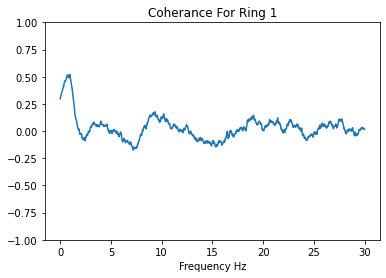

In [40]:
##make ring ensembles
RRing = [R1, R2, B1, C4]
RCoher = []
for i in range(len(RRing) - 1):
    RCoher.append(DoCoherance(RRing[i], RRing[i+1]))
    
RCoher = np.array(RCoher)
Ring1 = np.sum(RCoher, axis = 0)/len(RCoher[:, 0])

plt.plot(np.arange(0, 30, 30/len(Ring1)), Ring1)
plt.ylim([-1, 1])
plt.title('Coherance For Ring 1')
plt.xlabel('Frequency Hz')
plt.show()

C:\Users\rcoulsey\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


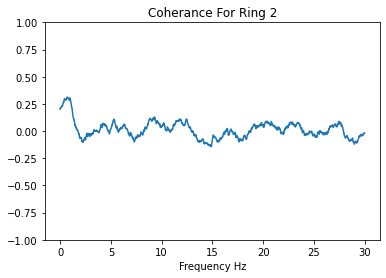

In [41]:
##make ring ensembles
BRing = [R1, R2, B1, B2, B3]
BCoher = []
for i in range(len(BRing) - 1):
    BCoher.append(DoCoherance(BRing[i], BRing[i+1]))
    
BCoher = np.array(BCoher)
Ring2 = np.sum(BCoher, axis = 0)/len(BCoher[:, 0])

plt.plot(np.arange(0, 30, 30/len(Ring2)), Ring2)
plt.ylim([-1, 1])
plt.title('Coherance For Ring 2')
plt.xlabel('Frequency Hz')
plt.show()

C:\Users\rcoulsey\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


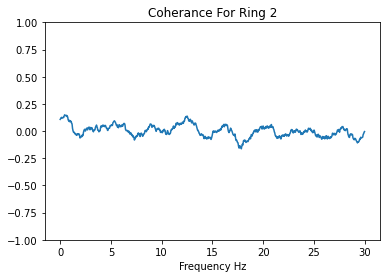

In [42]:
##make ring ensembles
GRing = [G1, G2, B1, B2, B3, G3]
GCoher = []
for i in range(len(GRing) - 1):
    GCoher.append(DoCoherance(BRing[i], GRing[i+1]))
    
GCoher = np.array(GCoher)
Ring3 = np.sum(GCoher, axis = 0)/len(GCoher[:, 0])

plt.plot(np.arange(0, 30, 30/len(Ring3)), Ring3)
plt.ylim([-1, 1])
plt.title('Coherance For Ring 3')
plt.xlabel('Frequency Hz')
plt.show()

In [50]:
np.savetxt('ring1.txt', Ring1, fmt='%f')
np.savetxt('ring2.txt', Ring2, fmt='%f')
np.savetxt('ring3.txt', Ring3, fmt='%f')